<a href="https://colab.research.google.com/github/suleymansamakon/Java/blob/master/Bitirme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Input
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Flatten, BatchNormalization

from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D

from tensorflow.keras.layers import Input, Activation, Add

from tensorflow.keras.models import Model

from tensorflow.keras.regularizers import l2

from tensorflow.keras.optimizers import Adam





path= "/content/drive/MyDrive/dataset/age_gender.csv"
dataframe = pd.read_csv(path)
dataframe.head()
dataframe1 = pd.DataFrame(dataframe)
dataframe1['pixels'] = dataframe1.pixels.apply
(lambda x: np.reshape(np.array(x.split(' '), 
dtype='float32'), (48, 48)))
dataframe1['pixels'] = dataframe1['pixels'] / 255
resim = dataframe1['pixels'][5]

plt.imshow(resim, cmap='gray')
plt.axis('off')

X = np.zeros(shape=(23705, 48, 48))
for i in range(len(dataframe1["pixels"])):
    X[i] = dataframe1["pixels"][i]

yas = dataframe1['age']
yas = yas.astype(float)
yas = np.array(yas)
yas.shape

cinsiyet = dataframe1['gender']
cinsiyet = np.array(cinsiyet)
cinsiyet.shape
labels_f = []

i = 0

while i < len(yas):
    label = []
    label.append([yas[i]])
    label.append([cinsiyet[i]])
    labels_f.append(label)
    i += 1

labels_f = np.array(labels_f)

labels_f.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, labels_f, test_size=0.25, random_state=42)

print(X_test.shape)

print(X_train.shape)

print(Y_test.shape)

print(Y_train.shape)

Y_train_2 = [Y_train[:, 1], Y_train[:, 0]]
Y_test_2 = [Y_test[:, 1], Y_test[:, 0]]






def Convolution(input_tensor, filters):
    x = Conv2D(filters=filters, kernel_size=(3, 3), padding='same',
               strides=(1, 1), kernel_regularizer=l2(0.001))(
        input_tensor)

    x = Dropout(0.1)(x)

    x = Activation('relu')(x)

    return x


def model(input_shape):
    inputs = Input((input_shape))

    conv_1 = Convolution(inputs, 32)

    maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)

    conv_2 = Convolution(maxp_1, 64)
    # 64-128-256 filtre sayısı
    maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)

    conv_3 = Convolution(maxp_2, 128)

    maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)

    conv_4 = Convolution(maxp_3, 256)

    maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

    flatten = Flatten()(maxp_4)

    dense_1 = Dense(64, activation='relu')(flatten)
# 64 tane nöron koyuldu
    dense_2 = Dense(64, activation='relu')(flatten)

    drop_1 = Dropout(0.2)(dense_1)

    drop_2 = Dropout(0.2)(dense_2)

    output_1 = Dense(1, activation="relu", name='cinsiyet_dogruluk_orani')(drop_1)

    output_2 = Dense(1, activation="sigmoid", name='yas_dogruluk_orani')(drop_2)

    model = Model(inputs=[inputs], outputs=[output_1, output_2])

    model.compile(loss=["binary_crossentropy", "mae"], optimizer="Adam",

                  metrics=["accuracy"])

    return model


Model = model((48, 48, 1))

Model.summary()

History = Model.fit(X_train, Y_train_2, batch_size=64,
                      validation_data=(X_test, Y_test_2), epochs=32)

pred = Model.predict(X_test)
pred[1]
from keras import models
save_model=models.save_model(Model, '/content/drive/MyDrive/models/model.h5')




Model=models.load_model('/content/drive/MyDrive/models/model.h5')
# Model.summary()



import cv2
import numpy as np


def load_and_prepare_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (48, 48), interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.array(gray, dtype='float32')
    gray = gray.reshape((48, 48))
    gray = gray / 255
    plt.imshow(gray, cmap='gray')
    return gray


def test_image(image, Model):
    pred_1 = Model.predict(np.array([image]))
    cinsiyetler = ['Erkek', 'Kadin']
    yas = int(np.round(pred_1[1][0]))
    cinsiyet = int(np.round(pred_1[0][0]))
    print("Tahmini Yas :  ", str(yas))
    print("Tahmini Cinsiyet: ", cinsiyetler[cinsiyet])





Model=models.load_model('/content/drive/MyDrive/models/model.h5')
prepared_image = load_and_prepare_image('/content/drive/MyDrive/foto10.jpg')
test_image(prepared_image, Model)


In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Model=models.load_model('/content/drive/MyDrive/models/model.h5')
Model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 conv2d_28 (Conv2D)             (None, 48, 48, 32)   320         ['input_8[0][0]']                
                                                                                                  
 dropout_42 (Dropout)           (None, 48, 48, 32)   0           ['conv2d_28[0][0]']              
                                                                                                  
 activation_28 (Activation)     (None, 48, 48, 32)   0           ['dropout_42[0][0]']             
                                                                                            

Tahmini Yas :   36
Tahmini Cinsiyet:  Erkek


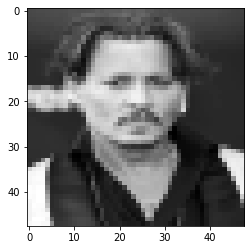

In [2]:
from keras import models
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def load_and_prepare_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (48, 48), interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.array(gray, dtype='float32')
    gray = gray.reshape((48, 48))
    gray = gray / 255
    plt.imshow(gray, cmap='gray')
    return gray


def test_image(image, Model):
    pred_1 = Model.predict(np.array([image]))
    cinsiyetler = ['Erkek', 'Kadin']
    yas = int(np.round(pred_1[1][0]))
    cinsiyet = int(np.round(pred_1[0][0]))
    print("Tahmini Yas :  ", str(yas))
    print("Tahmini Cinsiyet: ", cinsiyetler[cinsiyet])





Model=models.load_model('/content/drive/MyDrive/models/model.h5')
prepared_image = load_and_prepare_image('/content/drive/MyDrive/photos/foto5.jpg')
test_image(prepared_image, Model)


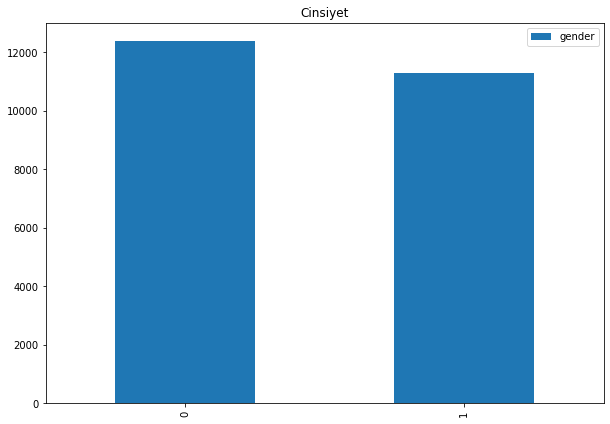

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/age_gender.csv")
df1 = pd.DataFrame(df)

plt.figure(figsize=(10, 7))
ax = df1.gender.value_counts().plot.bar(x='0=Erkek 1=Kadın', y='Count', title='Cinsiyet',
                                        legend=(1,0, ('Erkek', 'Kadin')))




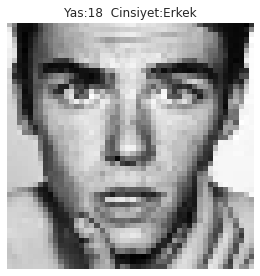

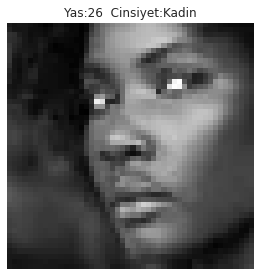

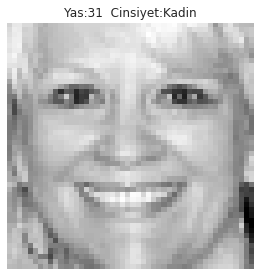

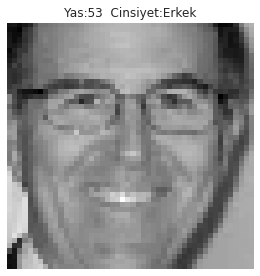

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/age_gender.csv")
df1 = pd.DataFrame(df)

df1['pixels'] = df1['pixels'].apply(lambda x: np.reshape(np.array(x.split(), dtype="float32"), (48, 48)))



def plot_data(rows, cols, lower_value, upper_value):
    fig = plt.figure(figsize=(cols * 3, rows * 4))
    for i in range(1, cols * rows + 1):
        k = np.random.randint(lower_value, upper_value)
        
        cinsiyet = [df.gender[k]]
        if cinsiyet==[0]:
          cinsiyet='Erkek'
        else:
            cinsiyet='Kadin'
        yas = df.age[k]
        im = df.pixels[k]
        plt.imshow(im, cmap='gray')
        plt.axis('off')
        plt.title(f'Yas:{yas}  Cinsiyet:{cinsiyet}')
        plt.tight_layout()
        plt.show()


plot_data(rows=1, cols=4, lower_value=0, upper_value=len(df))